# <code style="background:PowderBlue;color:black">TASK
### Machine Learning model to predict the quality of wine using linear regression only Jupyter notebook code.

### <code style="background:Lavender;color:black">Importing Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### <code style="background:Lavender;color:black">Reading the dataset

In [36]:
wine_data=pd.read_csv("C:\\Users\\saism\\OneDrive\\Documents\\Bharat Internship\\Wine Quality Prediction\\Winequality.csv")


In [37]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


> Dataset contains 1599 rows and 12 columns

In [38]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### <code style="background:Lavender;color:black">Checking null values


In [41]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## <code style="background:Lavender;color:black">EDA(Exploratory Data Analysis)

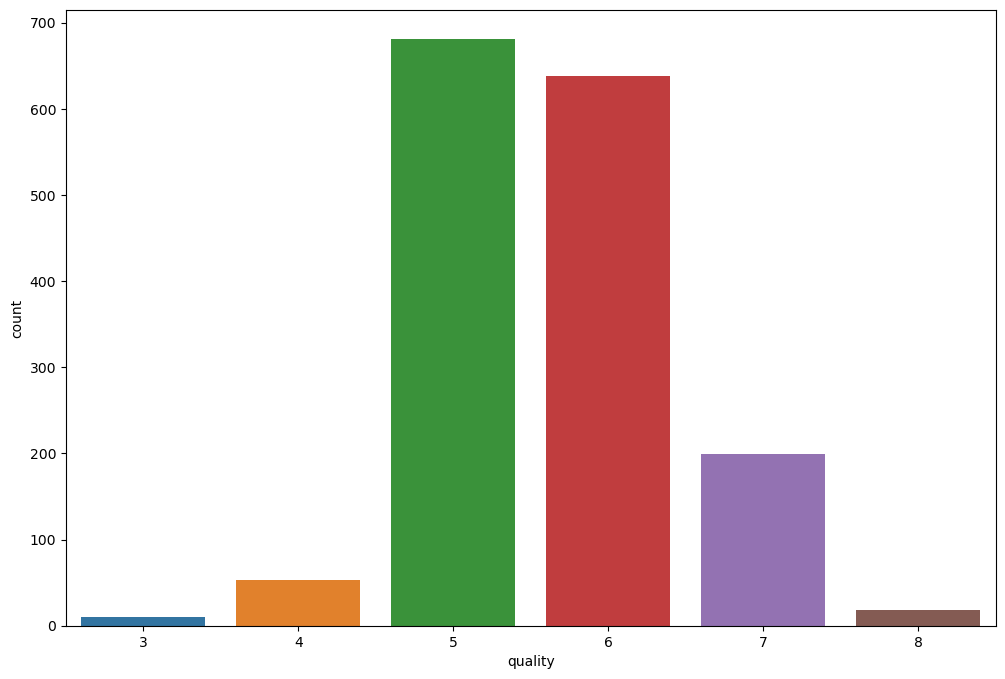

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(data=wine_data,x="quality")
plt.show()

### <code style="background:Lavender;color:black">Checking Outliers

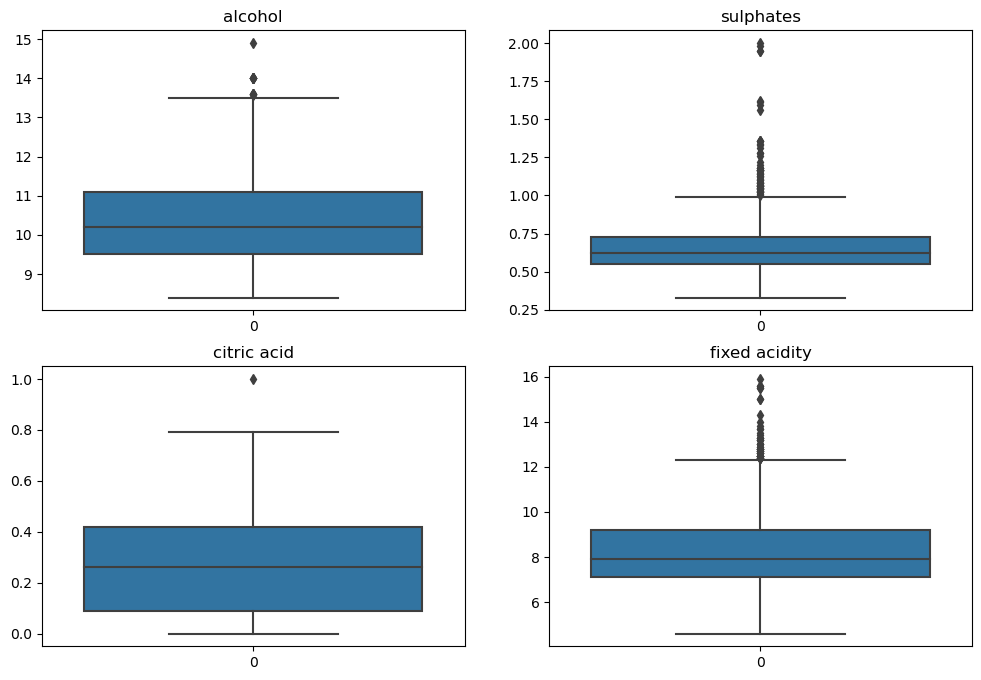

In [43]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))

### BoxPlot for children
sns.boxplot(data=wine_data["alcohol"],ax=axes[0,0])
axes[0,0].set_title("alcohol")

### Box Plot for Annual_Income
sns.boxplot(data=wine_data["sulphates"],ax=axes[0,1])
axes[0,1].set_title("sulphates")

### Box Plot for "Age"
sns.boxplot(data=wine_data["citric acid"],ax=axes[1,0])
axes[1,0].set_title("citric acid")

### Box Plot for "Family_Members"
sns.boxplot(data=wine_data["fixed acidity"],ax=axes[1,1])
axes[1,1].set_title("fixed acidity")

plt.show()

<Axes: >

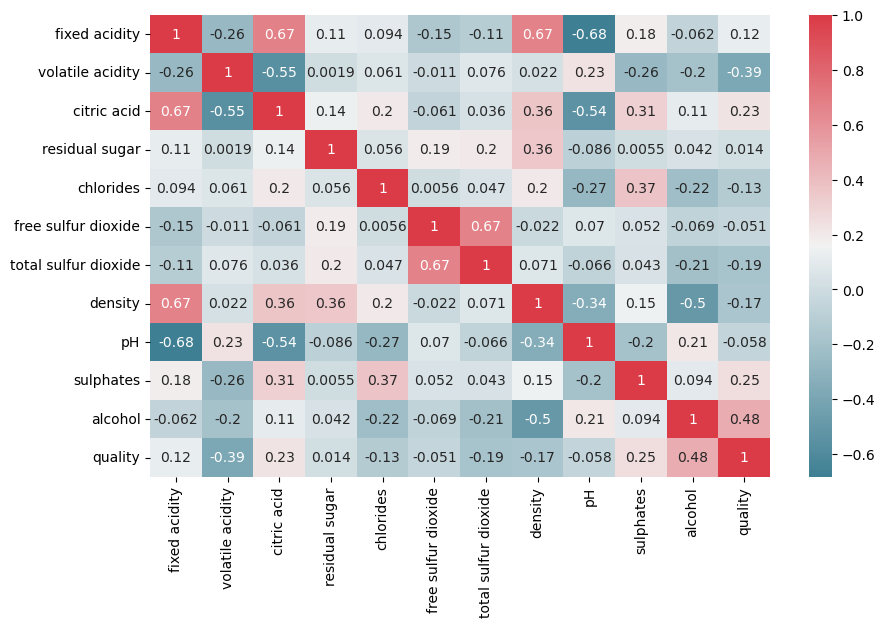

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(wine_data.corr(),annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

> #### Strongly correlated items 
Fixed acidity and citric acid
Free sulfur dioxide and Total sulfur dioxide
Fixed acidity and Density
Alcohol and Quality

> #### Weakly correlated items
Citric acid and Volatile acidity
Fixed acidity and pH
Density and Alcohol





### <code style="background:Lavender;color:black">Removing Outliers

In [45]:
for feature in wine_data.columns[:10]:
    Q1=np.percentile(wine_data[feature],25,interpolation='midpoint')
    Q3=np.percentile(wine_data[feature],75,interpolation='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    upper_lim=Q3+1.5*IQR
    wine_data1 = wine_data[(wine_data[feature] >low_lim ) & (wine_data[feature] < upper_lim)]



C:\Users\saism\AppData\Local\Temp\ipykernel_8284\919017240.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(wine_data[feature],25,interpolation='midpoint')
C:\Users\saism\AppData\Local\Temp\ipykernel_8284\919017240.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(wine_data[feature],75,interpolation='midpoint')


In [46]:
### Rechecking shape of dataset

In [47]:
wine_data1.shape

(1540, 12)

> The new dataset contains 1540 rows and 12 columns

### <code style="background:Lavender;color:black">Data Preprocessing

In [48]:
wine_data1['quality'] = wine_data1.quality.apply(lambda x:1 if x>=7 else 0)


C:\Users\saism\AppData\Local\Temp\ipykernel_8284\1517928145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data1['quality'] = wine_data1.quality.apply(lambda x:1 if x>=7 else 0)


In [49]:
wine_data1['quality'].value_counts()

0    1333
1     207
Name: quality, dtype: int64

In [50]:
X=wine_data1.drop("quality",axis=1)
y=wine_data1["quality"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## <code style="background:Lavender;color:black">MODEL TRAINING

## <code style="background:Lavender;color:black">Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
lr.coef_

array([ 3.51215873e-02, -1.01056676e-01,  3.02952956e-02,  2.60680610e-02,
       -5.37492890e-01, -3.13271227e-04, -6.57593994e-04, -4.14770382e+01,
       -2.30590089e-02,  5.89811173e-01,  6.80570677e-02])

In [54]:
lr.intercept_


40.233099032884304

In [55]:
y_pred=lr.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
MSE=mean_squared_error(y_test,y_pred)
R_Squared=r2_score(y_test,y_pred)

In [58]:
print(f"Mean Square Error:{MSE}")
print(f"R2 Score:{R_Squared}")

Mean Square Error:0.09088321763922248
R2 Score:0.2433922283346026


In [61]:
from sklearn import metrics


In [63]:
print('Training Accuracy : ', metrics.roc_auc_score(y_train, lr.predict(X_train)))
print('Validation Accuracy : ', metrics.roc_auc_score(y_test, lr.predict(X_test)))

Training Accuracy :  0.8834326756188909
Validation Accuracy :  0.8865291794646775
